# import

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# path to string

In [2]:
path = r'C:\Users\leevg\OneDrive\Desktop\CF\DI\A4\03-2022 Instacart Basket Analysis'

# import data

In [3]:
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.9 merged.pkl'))

In [4]:
df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df_merged.shape

(32404859, 30)

# 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

# This data set includes PII, such as the customers' first and last names, age, and state.

# Because names are particularly sensitive, I will have to exclude these two columns.

In [7]:
# New dataframe to equal old one, minus the two columns

In [6]:
df_secure = df_merged.drop(columns = ['first_name', 'last_name'])

In [7]:
df_secure.head(2)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,order_frequency,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


# 3. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

# 3a. Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

In [8]:
# Check 'state' count

In [8]:
df_secure['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [10]:
# 50 states, plus D.C

In [9]:
# Create region list

result = []

for value in df_secure['state']:
    if (value == 'Maine') or (value == 'New Hampshire') or (value == 'Vermont') or (value == 'Massachusetts') or (value == 'Rhode Island') or (value == 'Connecticut') or (value == 'New York') or (value == 'Pennsylvania') or (value == 'New Jersey'):
        result.append('Northeast')
    elif (value == 'Wisconsin') or (value == 'Michigan') or (value == 'Illinois') or (value == 'Indiana') or (value == 'Ohio') or (value == 'North Dakota') or (value == 'South Dakota') or (value == 'Nebraska') or (value == 'Kansas') or (value == 'Minnesota') or (value == 'Iowa') or (value == 'Missouri'):
        result.append('Midwest')
    elif (value == 'Delaware') or (value == 'Maryland') or (value == 'District of Columbia') or (value == 'Virginia') or (value == 'West Virginia') or (value == 'North Carolina') or (value == 'South Carolina') or (value == 'Georgia') or (value == 'Florida') or (value == 'Kentucky') or (value == 'Tennessee') or (value == 'Mississippi') or (value == 'Alabama') or (value == 'Oklahoma') or (value == 'Texas') or (value == 'Arkansas') or (value == 'Louisiana'):
        result.append('South')
    elif (value == 'Idaho') or (value == 'Montana') or (value == 'Wyoming') or (value == 'Nevada') or (value == 'Utah') or (value == 'Colorado') or (value == 'Arizona') or (value == 'New Mexico') or (value == 'Alaska') or (value == 'Washington') or (value == 'Oregon') or (value == 'California') or (value == 'Hawaii'):
        result.append('West')

In [10]:
# Check

result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [14]:
# Add region column to dataframe

In [11]:
df_secure['region'] = result

In [12]:
df_secure['region'].head(5)

0    South
1    South
2    South
3    South
4    South
Name: region, dtype: object

In [13]:
df_secure['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

# 3b. Determine whether there’s a difference in spending habits between the different U.S. regions.

In [24]:
# Create crosstab to check

In [14]:
crosstab = pd.crosstab(df_secure['region'], df_secure['spending_flag'], dropna = False)

In [15]:
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155968,7441357
Northeast,108200,5614536
South,209691,10582194
West,160354,8132559


In [16]:
crosstab.to_clipboard()

In [39]:
# Calculating percentage of high spenders out of total population for each region

In [17]:
MW = (155968 / (155968 + 7441357)) * 100
NE = (108200 / (108200 + 5614536)) * 100
S = (209691 / (209691 + 10582194)) * 100
W = (160354 / (160354 + 8132559)) * 100

In [18]:
MW

2.052933104744104

In [19]:
NE

1.8907040268850424

In [20]:
S

1.9430433144904713

In [21]:
W

1.9336269414619447

# High spenders make up about 2% of the population of each region

# 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [40]:
# Low activity flag ( < 5 orders)

In [22]:
df_secure.loc[df_secure['max_order'] < 5, 'exclusion_flag'] = 'Low activity customer'

In [23]:
df_secure.loc[df_secure['max_order'] >= 5, 'exclusion_flag'] = 'Normal activity customer'

In [24]:
df_secure['exclusion_flag'].value_counts(dropna = False)

Normal activity customer    30964564
Low activity customer        1440295
Name: exclusion_flag, dtype: int64

In [46]:
# Create dataframe with only low activity customers

In [25]:
df_low_activity = df_secure[df_secure['exclusion_flag'] == 'Low activity customer']

In [47]:
# Check low activity data

In [26]:
df_low_activity['max_order'].value_counts(dropna = False)

4    753543
3    686741
2         6
1         5
Name: max_order, dtype: int64

In [49]:
# Orders are under 5, so all is ok

In [50]:
# Create dataframe excluding low activity customers

In [27]:
df_normal_activity = df_secure[df_secure['exclusion_flag'] == 'Normal activity customer']

In [28]:
# Check normal activity data

In [29]:
df_normal_activity['max_order'].value_counts(dropna = False)

99    1171333
8      811843
6      811396
9      810213
7      803979
       ...   
93      50333
90      48328
97      44949
98      44587
96      40453
Name: max_order, Length: 95, dtype: int64

In [31]:
# Export normal activity set

In [32]:
df_normal_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_normal_activity.pkl'))

# 5.The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

# (Age variable)

In [34]:
df_secure['age'].value_counts().sort_index()

18    500474
19    519606
20    502848
21    512527
22    513853
       ...  
77    502120
78    495311
79    529742
80    515246
81    509284
Name: age, Length: 64, dtype: int64

In [35]:
df_secure['age'].describe()

count    3.240486e+07
mean     4.946527e+01
std      1.848558e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

In [36]:
# Min: 18
# Max: 81
# Avg: 49

In [38]:
# Create 'age' list

age_profile_list = []

for value in df_secure['age']:
    if (value >= 18) and (value <= 24):
        age_profile_list.append('18-24')
    elif (value >= 25) and (value <= 34):
        age_profile_list.append('25-34')
    elif (value >= 35) and (value <= 44):
        age_profile_list.append('35-44')
    elif (value >= 45) and (value <= 54):
        age_profile_list.append('45-54')
    elif (value >= 55) and (value <= 64):
        age_profile_list.append('55-64')
    elif (value >= 65) and (value <= 74):
        age_profile_list.append('65-74')
    elif (value >= 75) and (value <= 84):
        age_profile_list.append('75-84')
    elif (value >= 85):
        age_profile_list.append('85+')

In [42]:
# Assign age list to column

df_secure['age_profile'] = age_profile_list

In [43]:
df_secure['age_profile'].value_counts().sort_index()

18-24    3573001
25-34    5054654
35-44    5062429
45-54    5111126
55-64    5028565
65-74    5005001
75-84    3570083
Name: age_profile, dtype: int64

# (Income variable)

In [44]:
df_secure['income'].value_counts().sort_index()

25903      20
25911      28
25937      39
25941      31
25955     392
         ... 
584097    826
590790     54
591089    176
592409    318
593901    640
Name: income, Length: 108012, dtype: int64

In [45]:
df_secure['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [47]:
# Min: 25903
# Max: 593901
# Avg: 99437

In [48]:
# Create 'income' list

income_profile_list = []

for value in df_secure['income']:
    if value < 25000:
        income_profile_list.append('0-25000')
    elif (value >= 25000) and (value <= 50000):
        income_profile_list.append('25000-50000')
    elif (value >= 50000) and (value <= 75000):
        income_profile_list.append('50000-75000')
    elif (value >= 75000) and (value <= 100000):
        income_profile_list.append('75000-100000')
    elif (value >= 100000) and (value <= 125000):
        income_profile_list.append('100000-125000')
    elif (value >= 125000) and (value <= 150000):
        income_profile_list.append('125000-150000')
    elif (value >= 150000) and (value <= 175000):
        income_profile_list.append('150000-175000')
    elif (value >= 175000) and (value <= 200000):
        income_profile_list.append('175000-200000')
    elif (value >= 200000) and (value <= 300000):
        income_profile_list.append('200000-300000')
    elif (value >= 300000) and (value <= 400000):
        income_profile_list.append('300000-400000')
    elif (value >= 400000) and (value <= 500000):
        income_profile_list.append('400000-500000')
    elif value >= 500000:
        income_profile_list.append('500000+')

In [49]:
# Assign income list to column

df_secure['income_profile'] = income_profile_list

In [51]:
df_secure['income_profile'].value_counts()

75000-100000     7147837
50000-75000      6848737
100000-125000    6183245
125000-150000    4580117
150000-175000    3743496
25000-50000      3594083
200000-300000     156820
300000-400000      53931
175000-200000      48901
400000-500000      28337
500000+            19355
Name: income_profile, dtype: int64

# (Goods variable)

In [52]:
df_secure['department_id'].value_counts().sort_index()

1     2234743
2       36291
3     1172428
4     9479291
5      153696
6      269253
7     2688123
8       97716
9      866627
10      34573
11     447572
12     708927
13    1875369
14     703033
15    1068058
16    5398747
17     738666
18     423802
19    2887550
20    1051249
21      69145
Name: department_id, dtype: int64

In [56]:
# Create 'goods' list

goods_profile_list = []

for value in df_secure['department_id']:
    if value == 1:
        goods_profile_list.append('Frozen')
    elif value == 2:
        goods_profile_list.append('Other')
    elif value == 3:
        goods_profile_list.append('Bakery')
    elif value == 4:
        goods_profile_list.append('Produce')
    elif value == 5:
        goods_profile_list.append('Alcohol')
    elif value == 6:
        goods_profile_list.append('International')
    elif value == 7:
        goods_profile_list.append('Beverages')
    elif value == 8:
        goods_profile_list.append('Pets')
    elif value == 9:
        goods_profile_list.append('Dry goods pasta')
    elif value == 10:
        goods_profile_list.append('Bulk')
    elif value == 11:
        goods_profile_list.append('Personal care')
    elif value == 12:
        goods_profile_list.append('Meat seafood')
    elif value == 13:
        goods_profile_list.append('Pantry')
    elif value == 14:
        goods_profile_list.append('Breakfast')
    elif value == 15:
        goods_profile_list.append('Canned goods')
    elif value == 16:
        goods_profile_list.append('Dairy eggs')
    elif value == 17:
        goods_profile_list.append('Household')
    elif value == 18:
        goods_profile_list.append('Babies')
    elif value == 19:
        goods_profile_list.append('Snacks')
    elif value == 20:
        goods_profile_list.append('Deli')
    elif value == 21:
        goods_profile_list.append('Missing')

In [57]:
# Assign goods list to column

df_secure['goods_profile'] = goods_profile_list

In [58]:
df_secure['goods_profile'].value_counts()

Produce            9479291
Dairy eggs         5398747
Snacks             2887550
Beverages          2688123
Frozen             2234743
Pantry             1875369
Bakery             1172428
Canned goods       1068058
Deli               1051249
Dry goods pasta     866627
Household           738666
Meat seafood        708927
Breakfast           703033
Personal care       447572
Babies              423802
International       269253
Alcohol             153696
Pets                 97716
Missing              69145
Other                36291
Bulk                 34573
Name: goods_profile, dtype: int64

# (Dependents variable)

In [59]:
df_secure['n_dependants'].value_counts().sort_index()

0    8097503
1    8081104
2    8091143
3    8135109
Name: n_dependants, dtype: int64

In [60]:
# Create 'dependents' list

dependents_profile_list = []

for value in df_secure['n_dependants']:
    if value == 0:
        dependents_profile_list.append('Non-parent')
    else:
        dependents_profile_list.append('Parent')

In [61]:
# Assign dependents list to column

df_secure['dependents_profile'] = dependents_profile_list

In [62]:
df_secure['dependents_profile'].value_counts()

Parent        24307356
Non-parent     8097503
Name: dependents_profile, dtype: int64

# 6. Create an appropriate visualization to show the distribution of profiles.

# (Age profile visualization)

In [66]:
df_secure['age_profile'].value_counts().sort_index()

18-24    3573001
25-34    5054654
35-44    5062429
45-54    5111126
55-64    5028565
65-74    5005001
75-84    3570083
Name: age_profile, dtype: int64

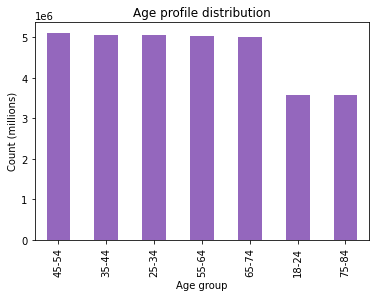

In [78]:
age_chart = df_secure['age_profile'].value_counts().plot.bar(color = 'tab:purple', xlabel = 'Age group', ylabel = 'Count (millions)', title = 'Age profile distribution')

In [79]:
age_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile_distribution.png'))

# (Income profile distribution)

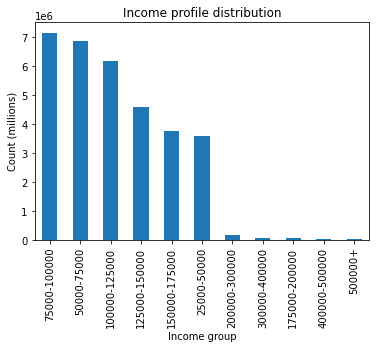

In [74]:
income_chart = df_secure['income_profile'].value_counts().plot.bar(color = 'tab:blue', xlabel = 'Income group', ylabel = 'Count (millions)', title = 'Income profile distribution')

In [75]:
income_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile_distribution.png'))

# (Goods profile distribution)

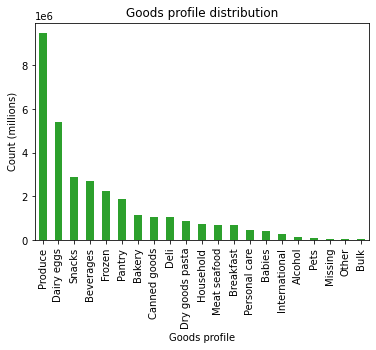

In [80]:
goods_chart = df_secure['goods_profile'].value_counts().plot.bar(color = 'tab:green', xlabel = 'Goods profile', ylabel = 'Count (millions)', title = 'Goods profile distribution')

In [81]:
goods_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'goods_profile_distribution.png'))

# (Dependents profile distribution)

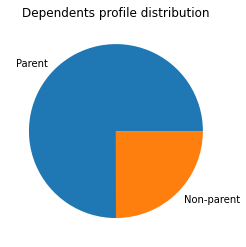

In [92]:
dependents_chart = df_secure['dependents_profile'].value_counts().plot.pie(title = 'Dependents profile distribution', ylabel='')

In [93]:
dependents_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dependents_profile_distribution.png'))

# 8. Compare your customer profiles with regions and departments. Can you identify a link between them?

In [101]:
region_spending_crosstab = pd.crosstab(df_secure['region'], df_secure['spending_flag'], dropna = False)

In [103]:
region_spending_crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155968,7441357
Northeast,108200,5614536
South,209691,10582194
West,160354,8132559


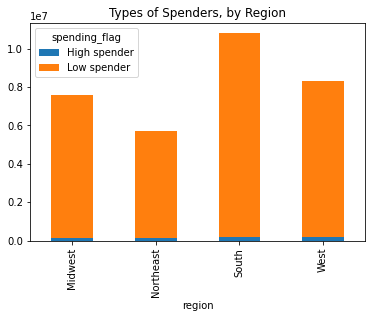

In [107]:
region_spending_chart = region_spending_crosstab.plot.bar(stacked = True, title = 'Types of Spenders, by Region')

In [108]:
region_spending_chart.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_spending_chart.png'))

# 10. Tidy up your script, export your final data set, and save your notebook.

In [110]:
df_secure.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10 Data Set.pkl'))